In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy

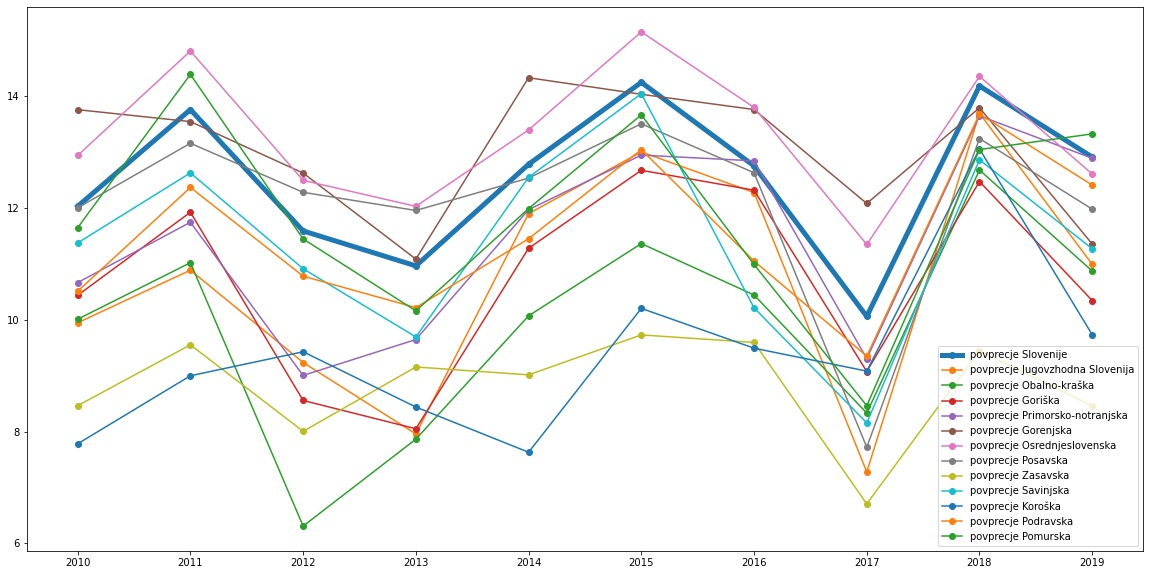

['"2013 SLOVENIJA"', '"2013 Pomurska"', '"2013 Podravska"', '"2013 Koroška"', '"2013 Savinjska"', '"2013 Zasavska"', '"2013 Posavska"', '"2013 Jugovzhodna Slovenija"', '"2013 Osrednjeslovenska"', '"2013 Gorenjska"', '"2013 Primorsko-notranjska"', '"2013 Goriška"', '"2013 Obalno-kraška"', '"2014 SLOVENIJA"', '"2014 Pomurska"', '"2014 Podravska"', '"2014 Koroška"', '"2014 Savinjska"', '"2014 Zasavska"', '"2014 Posavska"', '"2014 Jugovzhodna Slovenija"', '"2014 Osrednjeslovenska"', '"2014 Gorenjska"', '"2014 Primorsko-notranjska"', '"2014 Goriška"', '"2014 Obalno-kraška"', '"2015 SLOVENIJA"', '"2015 Pomurska"', '"2015 Podravska"', '"2015 Koroška"', '"2015 Savinjska"', '"2015 Zasavska"', '"2015 Posavska"', '"2015 Jugovzhodna Slovenija"', '"2015 Osrednjeslovenska"', '"2015 Gorenjska"', '"2015 Primorsko-notranjska"', '"2015 Goriška"', '"2015 Obalno-kraška"', '"2016 SLOVENIJA"', '"2016 Pomurska"', '"2016 Podravska"', '"2016 Koroška"', '"2016 Savinjska"', '"2016 Zasavska"', '"2016 Posavska"', 

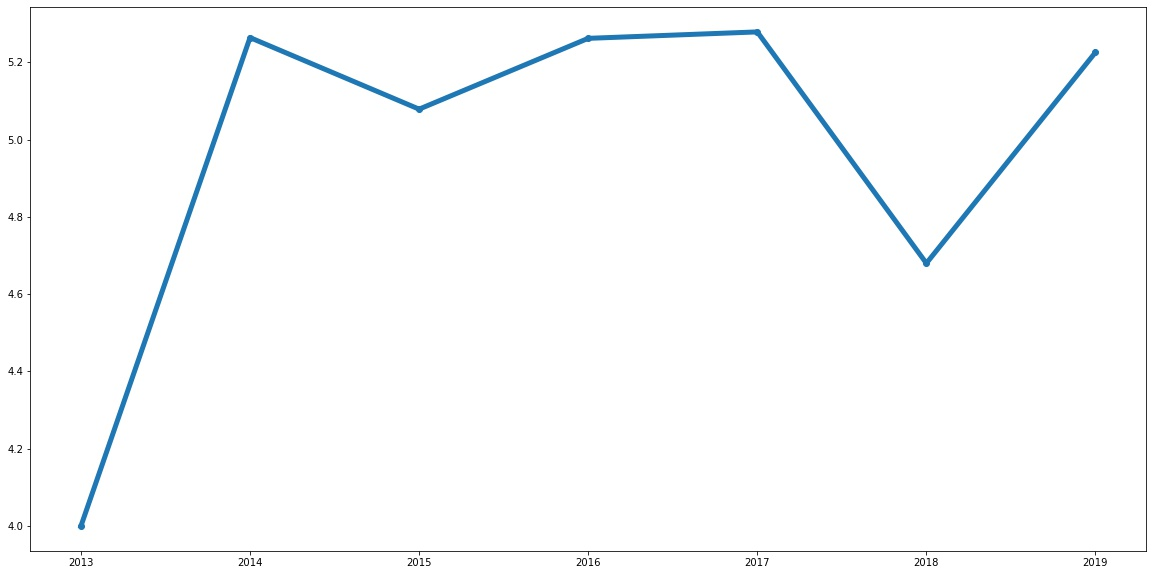

In [41]:
from csv import DictReader

podatki = []
i = 0

readerRatings = DictReader(open('1502410S_20210405-145226.csv', 'rt'))
for row in readerRatings:
    if i != 0:
        podatki.append(row)
    else:
        imenaKrajev = row
    i += 1


imena = []
stevilke = []

for key in podatki:
    imena.append(key["Povprečni pridelek (t/ha) pomembnejših kmetijskih kultur"])
    stevilke.append(key[None])

for key in range(len(stevilke)):
    for i in range(len(stevilke[0])):
        if stevilke[key][i] == "-":
            stevilke[key][i] = 0
        
podatki = {}

for i in range(len(imena)):
    podatki[imena[i]] = stevilke[i]


imenaKrajev = imenaKrajev["Povprečni pridelek (t/ha) pomembnejših kmetijskih kultur"].split(",")  
df = pd.DataFrame(podatki)
df.index = imenaKrajev

string = '"' + str(2010) + ' SLOVENIJA"'

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1
x = [0,1,2,3,4,5,6,7,8,9]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

plt.figure(figsize=(20,10))
plt.plot(povprecja, marker="o", label="povprecje Slovenije", linewidth=5)
plt.xticks(x,range(2010, 2020, 1))


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Jugovzhodna Slovenija"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Jugovzhodna Slovenija")


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Obalno-kraška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Obalno-kraška")


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Goriška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Goriška")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Primorsko-notranjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Primorsko-notranjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Gorenjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Gorenjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Osrednjeslovenska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Osrednjeslovenska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Posavska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Posavska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Zasavska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Zasavska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Savinjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Savinjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Koroška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Koroška")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Podravska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Podravska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Pomurska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Pomurska")


plt.legend()
plt.show()

povprecja = []
leta = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][1])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1
x = [0,1,2,3,4,5,6]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]


df = df.drop(labels=['"2010 SLOVENIJA"', '"2010 Pomurska"', '"2010 Podravska"', '"2010 Koroška"', '"2010 Savinjska"', '"2010 Zasavska"', '"2010 Posavska"', '"2010 Jugovzhodna Slovenija"', '"2010 Osrednjeslovenska"', '"2010 Gorenjska"', '"2010 Primorsko-notranjska"', '"2010 Goriška"', '"2010 Obalno-kraška"', '"2011 SLOVENIJA"', '"2011 Pomurska"', '"2011 Podravska"', '"2011 Koroška"', '"2011 Savinjska"', '"2011 Zasavska"', '"2011 Posavska"', '"2011 Jugovzhodna Slovenija"', '"2011 Osrednjeslovenska"', '"2011 Gorenjska"', '"2011 Primorsko-notranjska"', '"2011 Goriška"', '"2011 Obalno-kraška"', '"2012 SLOVENIJA"', '"2012 Pomurska"', '"2012 Podravska"', '"2012 Koroška"', '"2012 Savinjska"', '"2012 Zasavska"', '"2012 Posavska"', '"2012 Jugovzhodna Slovenija"', '"2012 Osrednjeslovenska"', '"2012 Gorenjska"', '"2012 Primorsko-notranjska"', '"2012 Goriška"', '"2012 Obalno-kraška"'], axis=0)
plt.figure(figsize=(20,10))
plt.plot(povprecja, marker="o", label="povprecje Slovenije", linewidth=5)
plt.xticks(x,range(2013, 2020, 1))
for i in range(0, 39):
    del imenaKrajev[0]
print(imenaKrajev)



In [5]:
prices = DictReader(open('1505000S.csv', 'rt'))

cene = []
i = 0
letaCene = []
for row in prices:
    if i != 0:
        cene.append(row)
    else:
        letaCene = row
    i += 1
    
imenaCene = []
stevilkeCene = []

for key in cene:
    imenaCene.append(key["Quantities and average prices of purchased agricultural products"])
    stevilkeCene.append(key[None])
    
cene = {}


for i in range(len(imenaCene)):
    cene[imenaCene[i]] = stevilkeCene[i]

letaCene = letaCene["Quantities and average prices of purchased agricultural products"].split(",")  
dfCene = pd.DataFrame(cene)
dfCene.index = letaCene
print(dfCene)

                           Pšenica in pira  Ječmen Koruza za zrnje  \
"2013 Quantity"                      64573    5479           42610   
"2013 Average price (EUR)"          180.97  177.26          169.23   
"2014 Quantity"                      82178    6429           84358   
"2014 Average price (EUR)"          169.09  153.31          125.28   
"2015 Quantity"                      74420   10559           83852   
"2015 Average price (EUR)"          168.33  133.78          131.77   
"2016 Quantity"                      50035    9810           81658   
"2016 Average price (EUR)"          133.81  132.95          130.61   
"2017 Quantity"                      84367   14312           79221   
"2017 Average price (EUR)"          153.97  128.76          141.25   
"2018 Quantity"                      45502   12479          119771   
"2018 Average price (EUR)"          159.36  142.37          146.93   
"2019 Quantity"                      77415   18948          128207   
"2019 Average price 